In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()

In [ ]:
x_train.shape, x_valid.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_valid.shape

((60000,), (10000,))

In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
x_train = x_train / 255.0
x_valid = x_valid / 255.0

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

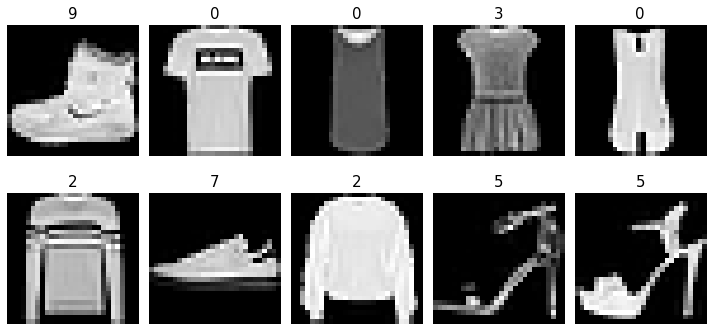

In [ ]:
# 시각화
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
    axes[i//5, i%5].imshow(x_train[i], cmap='gray')
    axes[i//5, i%5].set_title(str(y_train[i]), fontsize=15)
    plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)
    axes[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
tf.keras.backend.set_floatx('float64')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x = Flatten(input_shape=(28, 28))
print(x(x_train).shape)

(60000, 784)


In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def relu(x):
    return np.maximum(x, 0)

In [ ]:
x = np.linspace(-10, 10)
y = relu(x)

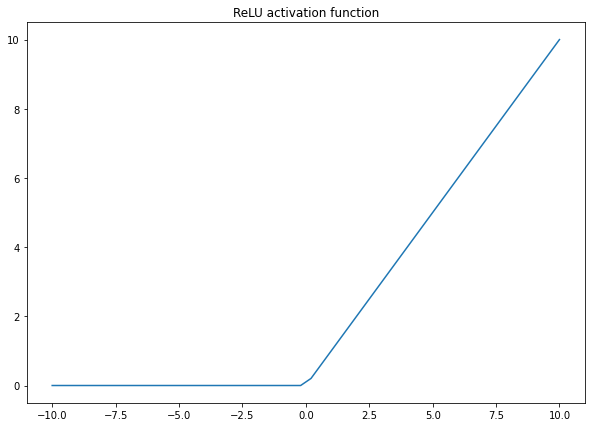

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.title('ReLU activation function')
plt.show()

In [ ]:
Dense(20, activation='relu')

In [ ]:
def sigmoid(z):
    return  1/(1+np.exp(-z))

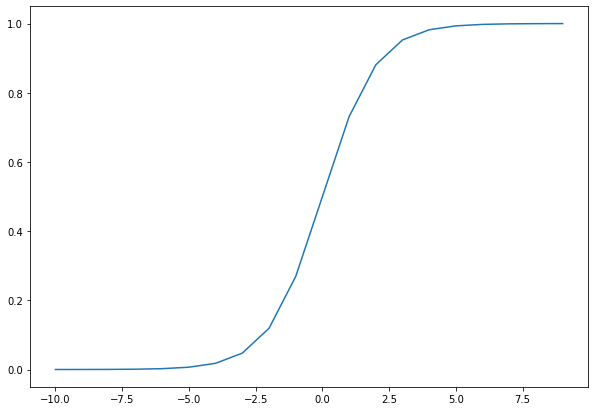

In [ ]:
plt.figure(figsize=(10, 7))

x = np.arange(-10, 10)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

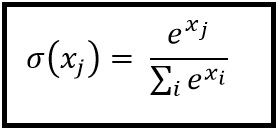

In [ ]:
Image('https://i.stack.imgur.com/wxJKQ.jpg')

In [ ]:
import numpy as np

a = np.random.uniform(low=0.0, high=10.0, size=3)

def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

y = softmax(a)
print('Class 별 확률 값 출력')
print('===' * 10)
for i in range(3):
    print('Class {} 의 확률: {:.3f}'.format(i, y[i]))
print('===' * 10)
print('Class 별 확률 값의 합: {:.1f}'.format(y.sum()))

Class 별 확률 값 출력
Class 0 의 확률: 0.298
Class 1 의 확률: 0.359
Class 2 의 확률: 0.343
Class 별 확률 값의 합: 1.0


In [ ]:
Dense(10, activation='softmax')

In [ ]:
model = Sequential([
    # Flatten으로 shape 펼치기
    Flatten(input_shape=(28, 28)),
    # Dense Layer
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    # Classification을 위한 Softmax 
    Dense(10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                6

In [ ]:
y_train[0]

9

In [ ]:
print(tf.one_hot(y_train[0], 10))

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    callbacks=[checkpoint],
                   )

Epoch 1/20
1875/1875 [==============================] - 16s 7ms/step - loss: 0.5028 - acc: 0.8165 - val_loss: 0.4680 - val_acc: 0.8255

Epoch 00001: val_loss improved from inf to 0.46796, saving model to my_checkpoint.ckpt
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3756 - acc: 0.8651 - val_loss: 0.4032 - val_acc: 0.8596

Epoch 00002: val_loss improved from 0.46796 to 0.40322, saving model to my_checkpoint.ckpt
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3395 - acc: 0.8777 - val_loss: 0.3996 - val_acc: 0.8561

Epoch 00003: val_loss improved from 0.40322 to 0.39958, saving model to my_checkpoint.ckpt
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3146 - acc: 0.8841 - val_loss: 0.3483 - val_acc: 0.8771

Epoch 00004: val_loss improved from 0.39958 to 0.34828, saving model to my_checkpoint.ckpt
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2957 - acc: 0.891

In [ ]:
# checkpoint 를 저장한 파일명을 입력합니다.
model.load_weights(checkpoint_path)

In [ ]:
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 2s 5ms/step - loss: 38.3493 - acc: 0.8754


[38.349289623356064, 0.8754]

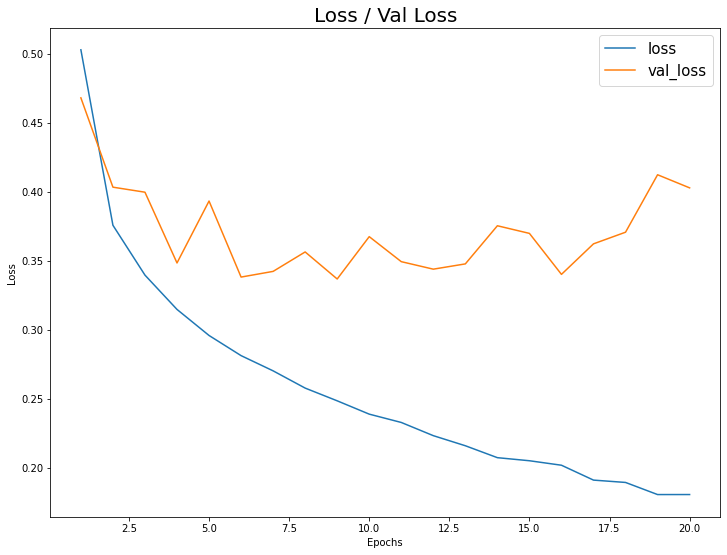

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

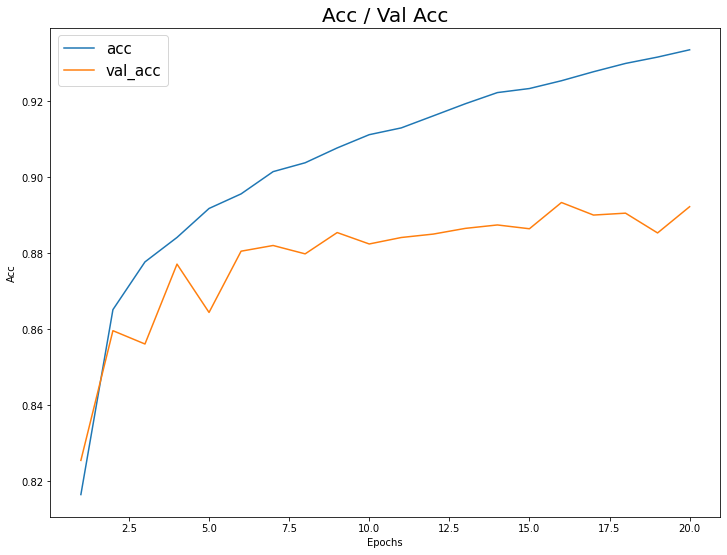

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()